## June 21

<details>

<summary> 8:00 - 10:30: Flash Code </summary>

- Spent a lot of time trying to get FLASH to work by installing the newer modules but still ran into the same problem of the executable hanging after running it. 
- Found that the milan1 nodes do not like the newer modules and use the 28core processors to run FLASH (from Cathering)

</details>

<details>

<summary> 10:30 - 1:00: Project Group Meeting </summary>

- Met with Brendan, Catherine, and Alan to discuss running FLASH and showing what things I've been able to visualize with yt. Learned that I can create a movie with a series of png files with a script from Brendan. Directory for this is in `/gpfs/projects/CalderGroup/BrendanSpace/movie.sh`. To run it: `bash movie.sh output_movie.mp4 <fps> path/to/images/*.png` where `<fps>` is frames per second, `bash movie.sh` is calling the script to run, `output_movie.mp4` is the name of the output video, and `path/to/images/*.png` is a directory with all of the png's to put in the movie.
- Alan gave me the original paper published about FLASH. Will need to read that. He went on to explain things about FLASH and how it runs/makes calculations. It basically breaks a grid down into 'refinements' in which the flux is calculated between them using the 'Reimann Problem'. Will need to read paper to learn further about this.

</details>

<details>

<summary> 1:00 - 2:30: Professional Development Workshop </summary>

- This week the speaker talked mainly about communication skills and basically social etiquette when it comes to working in a research group. 
- Main take away is to be an advocate for yourself, try to ask questions

</details>

<details>

<summary> Goals for tomorrow </summary>

- Setup git repo on Seawulf
- Run FLASH on a short 28core node
- Make a movie from the GasSloshing data using Brendan's script
- Start reading the FLASH paper
- If there's time, try to do FORTRAN problems from book

</details>

# June 22

<details>

<summary> 8:00 - 11:00: Nothing is working from my dorm </summary>

- I've tried logging into Seawulf from my dorm, doesn't work. I've tried then moving onto just doing FORTRAN problems but that doesn't work either because I can't get a compiler on this laptop without admin privledges. I then try to add Python on to this laptop and that doesn't work either, not sure why but I think it again has something to do with admin privleges. Plan on just going into IACS to do whatever I need for the rest of the day. Pretty ridiculous that I have to keep dealing with stuff like this. 
- I finally got everything to work on this laptop. Had to install Python and put the python.exe in PATH when running installer. With that I was able to pip install everything. 
- I also figured out how to set up Git in VS Code. First I clicked on the three dots on source tab and clicked "Add Remote". This then pulled up pop ups in a browser for me to sign into GitHub. I followed all that and it started working. So now I can just add and make commits from VS Code.

</details>

<details>

<summary> 1:00 - 2:00: Meet a Professor </summary>

- This meet a professor was not all that informational. Although main take aways were:
    - Try to do as much research as you can in order to be a better pHd candidate.
    - Definetly don't try to go outside of the US for a pHd.

</details>

<details>

<summary> 2:00 - 4:30: Running FLASH finally </summary>

- I was able to run FLASH on the 28 core node but it seems that the MPI wasn't able to run when I executed it with the flash4 file. I tried just `./flash4' and that seemed to run the simulation fine but I'm afraid this will take a long time without the MPI. I need to figure out if I need to use the updated modules of MPI, GCC, HDF5 etc. because the flash4.exe I compiled first doesn't have these updated modules. At least now I know it works. I'm just going to let it run this for now and see what it outputs. It seems to be working and making calculations. 
- I just stopped it because I think it was going to take too long to run the simulation. I'm gonna try updating the used modules to see if I can get multithreading. 
- Okay just recompiled and ran it using MPI and it seems to be working and certainly running faster. Just have to wait a couple seconds for it to hang for a bit after returning the `mpiexec` command.
- Nothing special needed to be done in order to run this. It just has to be on the 28 core node. Although, it seems that this node doesn't have the updated modules. So just stick with this until we figure out something for the milan nodes.
- I was wondering how to change the amount of time steps it calculates and this can be found in the `flash.par` file in the variable `nend` or `tmax`. I think which ever comes first the simulation will stop on that. 
- After messing with the `flash.par` file, I found that you can change the time between when FLASH outputs a plt file. You have to change the variable called `plotFileIntervalStep`. Specifically, this changes the amount of time steps between the output of plt file. I set this to 1 and it outputs a plt file every single time step. Useful if you want to get a good looking animation with a ton of different images. I'd like to transition to see if I can get this to give me an image at a good FPS to make a nice smooth movie of the Sedov explosion. 

<details>

<summary> Goals for tomorrow </summary>

- Make movie using Brendan's script
- Play with Sedov Problem a bit more
- Setup Seawulf to be able to push commits into my git repo

# June 23

<details>

<summary> 8:00 - 12:00 Setting up Git on Seawulf and other computers, Running FLASH: </summary>

- Can't seem to login to a node on Seawulf. I've been queued for some time, not sure what the reason is. I was able to set up my git repo on Seawulf though. You have to do the following:
    - Find your ssh key in the `.ssh` directory in the home directory
    - Copy the name of your public key and type `cat ~/.ssh/<name-of-key.pub>`. This will print out your key.
    - Copy this output and paste it into your ssh keys on GitHub
    - Come back to your command line and type ssh -T git@github.com. This authorizes your computer to make changes to git. 
    - To get the clone of my git repo, I typed `git clone git@github.com:kianhayes/reu2023.git` in the directory I wanted it and it copied it.

<br>

- I was having trouble running FLASH again because when I ran the `mpiexec` command it would throw an error saying that files were compiled during the make process with different versions of HDF5. I spend quite a bit of time figuring out what was wrong because the make file said the HDF5 directory was correct. I found that it's likely because I had Anaconda loaded with my modules and the HDF5 version in that is different than the one I had loaded for FLASH. Unloading Anaconda seemed to fix everything

- I'm now playing with the flash.par file. Specifically I'm trying to change the initial time that simulation starts although I was not getting good results doing this. It would just show a pixelated plot with no signs of an explosion. I believe changing the initial time messes with this simulation and I think that's due to how the explosion is initialized at t = 0. 
- I changed the intial time to 0 but decreased the minimum time step and that seemed to upset things quite a bit. I set it to track 10 time steps but it only output 4 at which point it threw an error saying: 

`DRIVER_ABORT: [Hydro]: Computed dt is not positive! Aborting! dtCheck=   0.0000000000000000`

- Not sure what this means and how the time step is calculated but I'm going to ask Alan about it later to see if he has any insight. Questions:
    * How does the simulation calculate dt
    * I feel like getting proper plots is a dance between setting up the right refinement and volume size, how do I set up the space to give me good resolution. What's the best way to go about this dance. Would like to get to a point where I can output a plot with really high resolution and no real pixilation
    * I want to get the simulation to output what the explosion looks like when it's very big without it starting at t = 0. Will it do this properly if I just change tinitial to a large number?

<details>

<summary> 1:00 - 4:00: FLASH details and optimizing the simulation </summary>

- Meeting with Alan:
    - First talked about how the time stepping works in fluid dynamic simulations and the importance of time step. Basically, if your time step is too big and tracked data flows outside of the box immediately next to the original then the process crashes. This can be parameterized by the CFL which is a constant involved with the calculation of the next time step to make sure things don't get out of hand. A CFL > 1 is not allowed. Setting the CFL smaller results in small time steps. The opposite is true if CFL is larger. 
    - We then moved on to talking with Catherine about running a sbatch script in which she showed me the certain parameters that needed to be changed in order to submit a job. 
    - She also outlined different parameters that can be changed in both the flash.par file and the the setup bash script regrading the amount of blocks. Basically, when the setup is ran, the max blocks is looked at and that amount of blocks is ALLOCATED to each core. Even if they aren't used entirely. So when the simulation is initialized there are 5000 blocks / core. 28 * 5000 adds up to a lot of blocks that aren't even being used. If you want to know an efficient amount to use we can look at the log file which tells the amount of blocks made by the simulation. This is often a lot smaller than 5000. This is why we often run into a problem when adding too many processes when the mpiexec command is ran. There is a memory overload and the program crashes. 
    - We then moved on to running a proper supernova problem where I submitted a job for that. 


<details>

<summary> VSCode on Seawulf Tutorial </summary>

### SSH Extension
- It's necessary to have the extension 'Remote SSH'

### Connecting to Seawulf
- In the bottom left hand corner there is a button that looks like electricity. Click this and select 'Connect Current Window to Host'
- It will ask for the name of remote server, in this field you'll type `your-username@login.seawulf.stonybrook.edu`. You can also use milan instead of login but you can set that up later
- It will then prompt you for what type of operating system the remote server is running, Seawulf is obviously using Linux so click that.
- It will then ask for your password. When the password is typed correctly, there will be a notification on DUO for you to accept. You must be careful taking to long to accept this because the SSH will time out and fail to connect if you wait long enough. 
- You're now working in what VSCode calls a "Workspace". VSCode specifically uses workspaces to organize the different projects developers may be working on. The workspace saves what SSH server you sign into and the directories you're working on. The great thing about VSCode is you can have your desired directories easily accessible on the side panel. To do this, in the top right corner click `File` then `Add Folder to Workspace`. Select the directory you want from Seawulf.
    - Unfortunately, you'll have a different workspace for different SSH servers, so you'll have to make a workspace for the Login nodes and the Milan nodes. 
    - For some reason, this resets your VSCode window, in which VSCode will have you sign into the SSH server again. Just do this again (I believe it doesn't do this again after the first time).
    - Add as many directories as you want

## Jupyter on VSCode
- The process of setting up and accessing your Jupyter server on VSCode may be easier than using a browser. The first step is to load your Anaconda environment that includes all the packages you want to use for Jupyter. Jupyter uses this environment for your Kernel. 
- In the terminal, type the command to start your Jupyter server with the usual `jupyter lab --no-browser --ip=node --port=some-number`
- After this executes, your terminal will print the URL to the server. Copy this.
- Open the jupyter notebook you want to work on and in the top right corner you'll see button `Select Kernel`. Click this and choose the option `Existing Jupyter server...`
- This will then prompt you to input your URL, paste it into this field.
- Once it connects to the server, VSCode will show a list of available Kernels to work in (It may just be one but I've often seen it show more than this, the one you want to choose will probably have a star next to it. You know this is the right one because it shows the path to your anaconda environment which is on Seawulf).
- You should be able to work on the notebook within VSCode now.

</details>


# June 26

<details>

<summary> 7:30 - 12:00: 3D Rendering and setting up Transfer Functions </summary>

- Spending most of the morning working with the 3D rendering
- I mostly copied and pasted what Brendan had and got the same results
- I tried changing the transfer function to where the alpha values aren't dictated by Gaussians but rather the alpha value throughout the function is one number. The plot looks like this: 

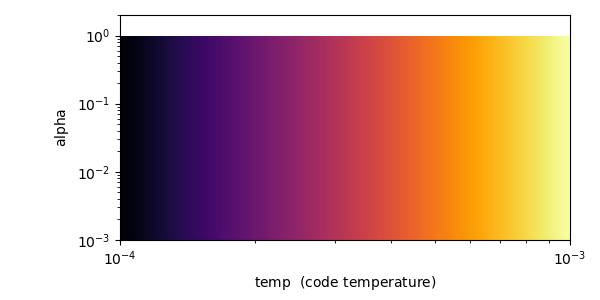

<details>

<summary> Code for this: </summary>

```python
    import numpy as np

    nlayers = 100
    bounds = (1e-4, 1e-3)

    # Setup for transfer function
    tfh = TransferFunctionHelper(ds) # Initiates the Transfer Function Helper object which helps with some of the syntax
    tfh.set_field(field) # Set what field we are looking at. Should match the source.
    tfh.set_log(True) # Volume rendering generally looks best in logspace
    tfh.grey_opacity = False
    tfh.set_bounds(bounds) 
    tfh.build_transfer_function() # Generates a blank transfer function that we can add gaussians to.

    # OPTION 1: USE THIS IF YOU WANT LAYERS OF GAUSSIANS WITH VARRYING ALPHA VALUES
    tfh.tf.add_layers(
        nlayers,
        w=0.01,
        mi=np.log10(bounds[0]),
        ma=np.log10(bounds[1]),
        col_bounds=[bounds[0], bounds[1]],
        alpha=np.logspace(-9, -5, 7),
        colormap="inferno",
    )

    # OPTION 2: USE THIS IF YOU WANT A COLOR MAP WITH A CONSISTANT ALPHA VALUE
    tfh.tf.map_to_colormap(np.log10(bounds[0]), np.log10(bounds[1]), colormap="inferno")

    # Adds the transfer function that we've made above to the souce
    my_source.transfer_function = tfh.tf 

    # Plots the made transfer function
    tfh.plot()

```

</details>


- I think this makes a better looking render although you can't really see through the rendered object. I also found that rendering with a resolution of 1080p takes a LONG time. The runtime says 42.4 seconds when doing this. 


- After this, I emailed Alan and found that my simulation I ran for the SNIA problem was not correct. He gave me a different data set to visualize instead. Not sure what else to do with the data set other than Slice Plots so I did that and output a png for each plt file.  

</details>


# June 27

<details>

<summary> 8:00 - 12:00 </summary>

- I spent a majority of the morning so far trying to figure out how to make a movie using the pngs I made yesterday since Brendan's script didn't seem to work. I figured out I can use a module on Seawulf called FFMPEG which converts files to different formats. I can use this to string together pngs and convert it into an mp4. I spent a long time doing this not gettting the results I want because I thought the movie was stuck on the first frame. I figured out though that the images in my directory were all the same because of the way I typed to for loop to save my images yesterday. It literally just looped through the data directory thirty times without changing from the first data file because of the way I called the files in an argument. I changed it to change the data file and that worked. The command to do this is:

```

ffmpeg -r <framerate> -i <input-files-%04d.png> output-file.mp4

```

- Where the `%04d` is a pattern matching part of the string that takes in the pattern 0000 to 9999 at that specific part in the string. So if there's stuff after that you have to include it as well. 

- This can probably aliased or a bash script can be made for it

# June 28

<details>

<summary> 7:30 - 11:00 </summary>

- I've spent most of the morning trying to explore the different data sets that I can work with. Through my reaserch I was able to find a few people to email about an informational interview because their careers seemed to align with what I want to do. Through that I've found many papers to draw inspiration from maybe. They don't offer where to find data that they used but maybe I could contact them. I plan to talk to Alan about all the different data sets that I could visualize and how to get them. With that I found many databases that I could use. Links:

http://turbulence.pha.jhu.edu/help/python/

https://sciserver.org/datasets/

https://www.mhdturbulence.com/

## June 29

<details>

<summary> 8:30 - 3:30 </summary>

- Today I'm gonne try to run the Sedov with a higher frame rate and the produce a 3D rendered movie out of that. 
- Spent part of the day looking at other data sets at Renaissance Simulation website where I was able to figure out how to download data from a url link using the built in python package 'requests' and 'zipfile' to unzip the data.
- Was able to make a movie of data from what I think is a galaxy simulation but it's not very interesting. 
- I was doing this in parallel with figuring out how to run a Sedov simulation with higher frame rate by messing with the time it takes to output files. Was able to make a Sliceplot movie from that but I want to make a 3D rendered movie. This took some messing with because there's a lot of exact aspects that you have to input about the camera along with it taking a long time to output an image based on its resolution.
- I got to a point where I was wondering how to make it output an image faster and found that you can use MPI on yt. Although this can't be done using a jupyter notebook. I found that you have to have mpi4py installed but not necessarily loaded. yt just has to be able to access it. Not sure how it works entirely.
- If you make a seperate python script you can set up all the 3D rendering stuff then from the command line type `mpiexec -n <processes> ./python-file.py`. I had to do this while my yt anaconda environment was activated for it to recognize mpi4py. 

# June 30

<details>

<summary> 8:00 - 3:00 </summary>

- The python script runs pretty well for processing one image but if I want to make a movie I'm trying to figure out how to run an sbatch script to maybe run on more processes. Testing this right now. 
- In order to get the parallelization look at the guide below this toggle.
- Running this on 2 nodes at a resolution of 1080x1080p took about 1 minute to complete which is pretty good! I wonder what the performance is on a GPU
- I was trying to run the .bash script with 5 nodes but it hates that for some reason. I spent a lot of time trying to figure out why and my initial thought was that processes finishing at different times was causing the thing to break because maybe it needs information about the scene and stuff from everything before it renders? I'm not sure but I ran with 4 nodes and that seems to work for some reason.
- Since I figured out that works I'm rendering all 60 data files at HD definition. Should look pretty cool because I found that the color changes as the simulation developes. 
- The nice thing about using yt for this is that it's able to handle all the data files in parallel, so it can process multiple renders at the same time (it may be all of them at once based on the output log). This is nice because it'll run MUCH faster than if it tried just doing each data file one by one. To do this, you can implement the following code: 

<details>

<summary> Running a Parallelized process with yt </summary>

- To use MPI with python, mpi4py must be downloaded in the environment, with that, you must activate your envirnoment before you run the script.
- After the script is made, you have to run it with the following command:

```
mpirun -np 8 python script.py
```

- Where `mpirun` calls MPI to run a script in parallel, `-np` option indicated the amount of processes to run, `python` says that the script is ran through python, and `<script.py>` is your python script file.
- Note: MPI must be enabled inside of your script in order for it to run in parallel. In yt, this is done simply by having a line that says `yt.enable_parallelism()`

<details>

<summary> Running in Parallel for a SBATCH script </summary>

- It's important to not have `module purge` at the begninning of your script. Not sure why but I had this when trying to do this at first and it took me a while to figure out that this was what was causing problems. 
- You can follow this example to set up a script to run a 3D rendering on yt:

```bash

#!/bin/bash
#SBATCH --job-name=3d-render
#SBATCH --output=output_hybrid.txt
#SBATCH --nodes=2
#SBATCH --ntasks-per-node=28
#SBATCH --time=4:00:00
#SBATCH -p short-28core

module load anaconda
source activate /gpfs/home/kmhayes/.conda/envs/yt

RUN_DIR=/gpfs/projects/CalderGroup/KianSpace/reu2023/plots/sedov/
LOGFILE=$RUN_DIR/3d_render.log

cd $RUN_DIR
echo 'Start of 3D Render', $(date) >> $LOGFILE
mpirun python ./3d_render.py >> $LOGFILE
echo 'End of 3D Render', $(date) >> $LOGFILE

conda deactivate

```

<details>

<summary> Code </summary>

```python

# Loads the time series data into a DataSeries object
data_series = yt.load('sedov_hdf5_plt_cnt_*')

# Iterates over the DataSeries object in parallel with `piter()` attached to the end of the data series variable
for ds in data_series.piter():
    # Make rendering
```

- It's funny finally getting this final product because I've been working on this all day and the video is only 2 seconds long 

# July 7

<details>

<summary> 12:00 - 5:00 </summary>

- I've been working on figuring out a way to visualize the convection that occurs in WDs due to carbon fusion using Brendan's data. This is known as the Urca process. After looking at the sliceplots that are made from every possible field, I want to find a way to visualize a combination of mass fraction to see if I can capture the convective motion that happens at the Urca shell. This has proven to be rather difficult and I'm not sure if it's because of the size of the data or what but it takes forever to make a 3D render using this data. Not sure why. I also have been unsuccessful in trying to add more than one source to a scene. I feel like there should be a way but need to mess with it more. 

# July 11

- It's been a bit since I've updated this so let me give a run down of what I've done since last time
- I've been able to make 3D Renders of the Urca Process data from Brendan. The most sucessful plot I've made is the mass fraction of Na23 which really shows the Urca shell and the mixing of na23 in that part of the WD. 
- I then moved to making the 3D render camera track around 360 degrees to see the whole thing which was also successful
- I've moved on to trying to combine different volume sources into the same scene. Although this seems to be very intensive as far as memory. Running time on the current parallelized task of this is up to 12 minutes now at only 400x400 resolution. 

# Good bounds for 3D Renders:

- XC12: (3.9945e-1, 3.997e-1)
- XNa23: (1e-4, 4e-4)
- Radial Velocity: ()

# July 12

- TODO today
    - Morning 
        - Start creating cookbook for YT 3d Renders
        - Look at Brendan's script for calculating Ye in the Urca data and try to make plots using that
    - Afternoon
        - Meet a Prof at 1
        - IT Meeting to fix computer at 2
        - LASTLY work on project poster